In [1]:
import numpy as np
import vtk
import os
import h5py
from pymicro.crystal.microstructure import Microstructure
#from esrf_mat_file import esrf_mat_file
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymicro.crystal.lattice

lambda_keV = 38.0
lambda_nm = 1.2398/ lambda_keV
Ti7Al = pymicro.crystal.lattice.Lattice.hexagonal(0.2931, 0.4694)  # nm

`t5_dct_cen_1_` is the second scan of the region *cen*, after the sample was mounted into nanox. there is a correspondance between the ids of scan `cen_` and `cen_1_` (eg 4 remained 4 but 3 became 16):

| 52 | 16 | 13 | 7 | 73 | 24 | 36 | 62 | 2 | 3 | 4 |
| --- |
| 85 | 17 | 12 | 9 | 79 | 24 | 32 | 66 | 1 | 16 | 4 |



In [3]:
micro = Microstructure.from_dct(data_root='id11/t5_/t5_dct_cen_1_/', grain_ids=[1, 5, 9, 24])

loaded volume with shape: 424 x 634 x 634
loading grain 1
adding block 0 to mesh for grain 1
loading grain 5
adding block 1 to mesh for grain 5
loading grain 9
adding block 2 to mesh for grain 9
loading grain 24
adding block 3 to mesh for grain 24


In [25]:
# check the position of each grain the the XYZ frame (DCT)
for g in micro.grains:
    print('grain %2d position: %6.3f, %6.3f, %6.3f' % (g.id, g.position[0], g.position[1], g.position[2]))

grain  1 position: -0.028,  0.137, -0.066
grain  5 position: -0.146, -0.096, -0.162
grain  9 position: -0.259,  0.020, -0.114
grain 24 position: -0.238,  0.005,  0.025


EBSD / DCT comparison at the surface
--

Here is the surface scan of the T5 sample:

![title](Grain ID.bmp)

And this is the surface view of the `t5_dct_cen_1_` scan:

<img src="t5_dct_cen_3d.png", width=300, height=300>

The DCT scan zone can be clearly identified in the EBSD scan. Because how matlab writes the data, to make the image above (see the code below), we need to swap X and Z axes in the DCT volume. We should make sur this is correct.

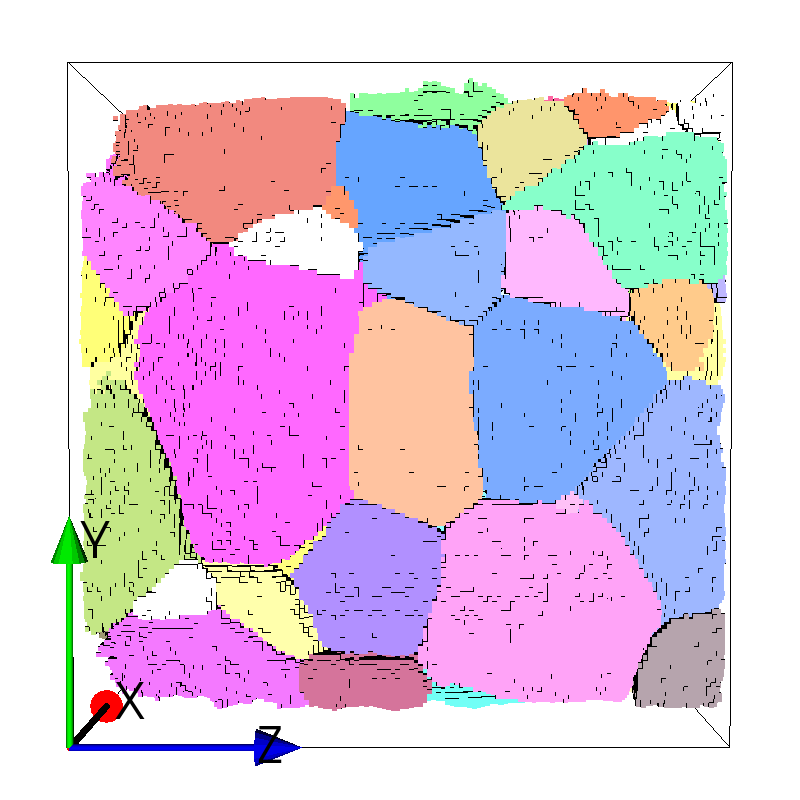

In [29]:
from pymicro.view.scene3d import Scene3D
from pymicro.view.vtk_utils import show_grains, axes_actor, box_3d, setup_camera
from IPython.display import Image

f = h5py.File(os.path.join('id11/t5_/t5_dct_cen_1_/5_reconstruction', 'phase_01_vol.mat'))
grain_ids = f['vol'].value[::3, 100:540:3, 80:560:3].transpose(2, 1, 0)
dims = np.array(grain_ids.shape)

#grains = show_grains((grain_ids == 1).astype(np.uint8))
grains = show_grains(grain_ids)
box = box_3d(size=dims)
axes = axes_actor(50, axisLabels=('X', 'Y', 'Z'), fontSize=50)
s3d = Scene3D(display=True, ren_size=(800, 800), name='t5_dct_cen_3d')
s3d.add(grains)
s3d.add(box)
s3d.add(axes)
cam = setup_camera(size=dims)
cam.SetFocalPoint(0.5 * dims)
cam.SetViewUp(0, 1, 0)
cam.SetPosition(-2 * dims[0], 0.5 * dims[0], 0.5 * dims[2])
s3d.set_camera(cam)
im = s3d.get_frame()
Image(im)

In [35]:
from scipy import ndimage
# figure out the center of mass of each grain taking the center of the image as reference
f = h5py.File(os.path.join('id11/t5_/t5_dct_cen_1_/5_reconstruction', 'phase_01_vol.mat'))
array = f['vol'].value.transpose(2, 1, 0)
print(array.shape)
voxel_size = 0.0014
for label in [1, 5, 9, 24]:
    array_bin = (array == label).astype(np.uint8)
    local_com = ndimage.measurements.center_of_mass(array_bin, array)
    com_mm = voxel_size * (local_com - 0.5 * np.array(array.shape))
    print('grain %2d position: %6.3f, %6.3f, %6.3f' % (label, com_mm[0], com_mm[1], com_mm[2]))

(634, 634, 424)
grain  1 position: -0.030,  0.140, -0.069
grain  5 position: -0.144, -0.091, -0.168
grain  9 position: -0.257,  0.022, -0.117
grain 24 position: -0.239,  0.005,  0.026


In [ ]:
nm = '/Volumes/PollockShare/Group Resources/Collaborative Projects/' \
     'Ti7_ESRF/id11/t5_/t5_dct_cen_1_/5_reconstruction/phase_01_vol.mat'

grainID = 1
grainIDs = [1,5,9,24]

matFile = esrf_mat_file(nm)
## Get correct reference frame
matFile.vol = matFile.vol.swapaxes(0,2)
matFile.vol = np.copy(matFile.vol,'C_CONTIGUOUS')
## Finished getting correct reference frame.
matFile.get_grain_orientations_dictionary() # read orientations from .mat files
matFile.get_microstructure_from_grains(grainIDs,name = '1_5_9_24')

In [5]:
from pymicro.view.vtk_utils import *
import vtk

## Grain 1
grain1 = micro.get_grain(1)
hklplanes = [pymicro.crystal.lattice.HklPlane(0,0,1)]
grain1_with_planes = grain_3d(grain1, hklplanes, show_normal = False, plane_opacity = 1.0, show_orientation = True)
tr = vtk.vtkTransform()
tr.Translate(grain1.position)
grain1_with_planes.SetUserTransform(tr)

1
(0.9647058823529412, 0.9725490196078431, 0.4549019607843137)


In [6]:
## grain 5
grain5 = micro.get_grain(5)
hklplanes = [pymicro.crystal.lattice.HklPlane(0,0,1)]
grain5_with_planes = grain_3d(grain5, hklplanes, show_normal = False, plane_opacity = 1.0, show_orientation = True)
tr = vtk.vtkTransform()
tr.Translate(grain5.position)
grain5_with_planes.SetUserTransform(tr)

5
(0.6784313725490196, 0.2549019607843137, 0.34901960784313724)


In [7]:
## grain 9
grain9 = micro.get_grain(9)
hklplanes = [pymicro.crystal.lattice.HklPlane(0,0,1)]
grain9_with_planes = grain_3d(grain9, hklplanes, show_normal = False, plane_opacity = 1.0, show_orientation = True)
tr = vtk.vtkTransform()
tr.Translate(grain9.position)
grain9_with_planes.SetUserTransform(tr)

9
(0.8745098039215686, 0.00784313725490196, 0.7450980392156863)


In [8]:
## grain 24
grain24 = micro.get_grain(24)
hklplanes = [pymicro.crystal.lattice.HklPlane(0,0,1)]
grain24_with_planes = grain_3d(grain24, hklplanes, show_normal = False, plane_opacity = 1.0, show_orientation = True)
tr = vtk.vtkTransform()
tr.Translate(grain24.position)
grain24_with_planes.SetUserTransform(tr)

24
(0.9137254901960784, 0.36470588235294116, 0.22745098039215686)


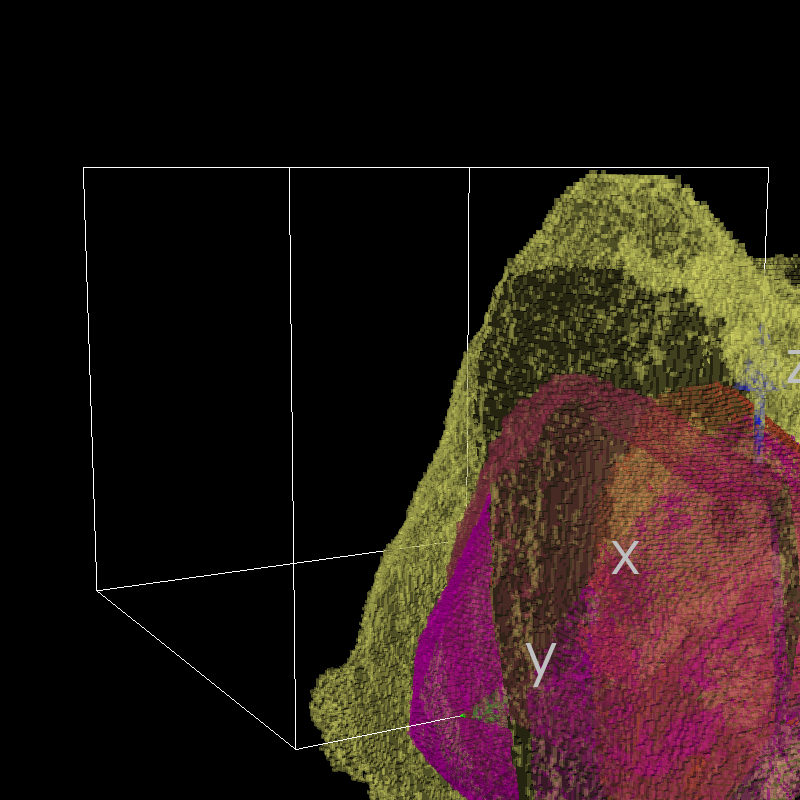

In [9]:
from vtk.util.colors import white, grey, black
from pymicro.view.scene3d import Scene3D

s3d = Scene3D(display=False, ren_size=(800, 800), name='t5grains', background=black)

grain_bbox = box_3d(size=dims, line_color=white)
axes = axes_actor(length = 100, fontSize = 60)
axes.GetXAxisCaptionActor2D().GetCaptionTextProperty().SetColor(grey)

cam = setup_camera(size=dims)
cam.Dolly(0.9)
cam.SetPosition(-2 * dims[0], 2*dims[1], 1 * dims[2])
cam.SetViewUp(0,0,1)

s3d.add(grain_bbox)
s3d.add(grain1_with_planes)
s3d.add(grain5_with_planes)
s3d.add(grain9_with_planes)
s3d.add(grain24_with_planes)
s3d.add(axes)
s3d.set_camera(cam)
#s3d.render()
im = s3d.get_frame()
Image(im)

In [14]:
del s3d

In [ ]:
del s3d
